# Data Analysis of The Online 3D Printings Store


**Store Landing Page**

# ![Landing Page](images/landing.png)


### Importing and Cleaning Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm


pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('datasets/sales_2018-09-23_2024-09-29.csv')
df.sample(10)


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,b2b,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,company_name,company_location_name,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_margin,gross_profit,gross_sales,net_sales,returns,return_fees,shipping,taxes,total_cost,total_tips,units_per_transaction,average_order_value,duties,additional_fees
0,2018-09-23,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2018-09-24,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2018-09-25,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2018-09-26,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2018-09-27,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [4]:
df.size

738375

In [5]:
df.isnull().sum().sort_values(ascending=False)

company_name               13425
company_location_name      13425
marketing_event_target     13423
marketing_event_type       13357
variant_sku                11761
product_type                7353
variant_title               6689
product_title               6227
referrer_host               4695
referrer_url                4695
billing_region              1831
shipping_city               1027
market_name                 1007
sale_kind                   1005
cancelled                   1005
order_name                  1005
referring_channel           1005
financial_status            1005
cost_tracked                1005
billing_country             1005
billing_city                1005
purchase_option             1005
api_client_title            1005
referring_platform          1005
adjustment                  1005
customer_type               1005
product_id                     0
order_id                       0
customer_id                    0
product_price                  0
day       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13425 entries, 0 to 13424
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      13425 non-null  object 
 1   order_id                 13425 non-null  int64  
 2   billing_city             12420 non-null  object 
 3   customer_id              13425 non-null  int64  
 4   product_id               13425 non-null  int64  
 5   product_price            13425 non-null  float64
 6   product_title            7198 non-null   object 
 7   product_type             6072 non-null   object 
 8   variant_id               13425 non-null  int64  
 9   variant_sku              1664 non-null   object 
 10  variant_title            6736 non-null   object 
 11  api_client_title         12420 non-null  object 
 12  shipping_city            12398 non-null  object 
 13  market_name              12418 non-null  object 
 14  purchase_option       

In [7]:
empty_cols = np.concatenate(([col for col in df.columns if (df[col] == 0).all()], df.columns[df.isna().all()]))
df.loc[:, empty_cols].head()


,b2b,gross_margin,gross_profit,return_fees,total_cost,total_tips,duties,additional_fees,company_name,company_location_name
0,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [8]:
df.drop(empty_cols, axis=1, inplace=True)

df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['variant_id'] = df['variant_id'].astype(str)
df['day'] = pd.to_datetime(df['day'])
df.product_type = df.product_type.str.replace('mini', 'Mini')

df['year'] = df['day'].dt.year
df['month'] = df['day'].dt.month
df['day_of_month'] = df['day'].dt.day

In [9]:
df.sale_kind.value_counts()

sale_kind
order     12263
return      157
Name: count, dtype: int64

In [10]:
df = df[(df.sale_kind == 'order') & df.net_sales != 0]

In [11]:
df = df[df.product_id != '0']

In [12]:
df.describe().round(2)

,day,product_price,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month
count,7072,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.0,7072.0,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00
mean,2021-11-04 14:36:59.457013504,132.40,116.54,-18.25,1.00,1.00,1.04,1.04,134.62,116.38,0.0,0.0,0.16,1.04,116.12,2021.36,6.28,15.34
min,2018-09-28 00:00:00,0.50,0.25,-9200.00,0.00,0.00,1.00,0.00,0.43,0.21,0.0,0.0,0.00,0.00,0.00,2018.00,1.00,1.00
25%,2021-01-31 00:00:00,49.00,49.00,-2.45,1.00,1.00,1.00,1.00,49.00,49.00,0.0,0.0,0.00,1.00,49.00,2021.00,3.00,7.00
50%,2021-05-04 00:00:00,55.00,55.00,0.00,1.00,1.00,1.00,1.00,59.00,55.00,0.0,0.0,0.00,1.00,54.84,2021.00,5.00,15.00
75%,2022-02-03 00:00:00,127.00,114.00,0.00,1.00,1.00,1.00,1.00,138.00,114.00,0.0,0.0,0.00,1.00,114.00,2022.00,11.00,23.00
max,2024-09-26 00:00:00,22000.00,18400.00,0.00,1.00,1.00,11.00,11.00,22000.00,18400.00,0.0,0.0,51.26,11.00,18400.00,2024.00,12.00,31.00
std,NaN,745.72,500.54,287.64,0.03,0.03,0.33,0.31,745.99,500.53,0.0,0.0,1.81,0.33,500.39,1.17,4.01,9.08


In [13]:
df.describe(include='object')


,order_id,billing_city,customer_id,product_id,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment
count,7072,7072,7072,7072,7072,5976,7072,1643,6632,7072,7067,7071,7072,7072,7072,7072,7072,7072,6616,7072,7072,7072,7072,4969,4969,7072,7072,1,40,7072
unique,5111,2184,3722,123,144,6,284,168,44,5,2269,2,1,2,1,5,5111,1,120,58,2,77,30,267,68,40,37,1,1,1
top,3051017765019,New York,5918842519782,5280927514779,Water Yourself,Mini,34575556771995,MCwateLB,Black,Online Store,New York,United States,One-time,No,No,paid,#2419,order,California,United States,First-time,2020-12,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,facebook_messenger,message,No
freq,11,75,55,602,602,3566,373,68,3940,6812,77,6058,7072,7044,7072,6946,11,7072,855,6100,5079,762,2033,902,1427,2167,2660,1,40,7072


### Sales Time Series

In [14]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['orders'], histfunc="sum")
fig.update_layout(
    title="Total Orders Over Time",
    xaxis_title="Day",
    yaxis_title="Total Orders",
    bargap=0.2,
    bargroupgap=0.1,
    width=1000,
    height=500
)
fig.show()

Here, we observe a steep increase in orders by the end of 2020. Afterward, the average number of orders decreased, but we can identify several seasonal patterns. Orders tend to rise towards the end of the year, with a slight uptick also occurring in May and June.


In [15]:
fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['net_sales'], histfunc="sum")
fig.update_layout(
    title="Total Net Sales Over Time",
    xaxis_title="Day",
    yaxis_title="Total Net Sales",
    bargap=0.2,
    bargroupgap=0.1,
    width=1000,
    height=500
)
fig.show()

We saw that after 2021 number of orders on average decreased significantly. However, the total net sales almost stayed on the same level. It is interesting to look at how it was achieved.


### Additional Features


In [16]:
df['unit_price'] = np.abs(df['product_price'] / df['net_quantity'])
df['discount_percentage'] = np.abs(df['discounts'] / df['product_price']) * 100
df['discount_rate'] = np.abs(df['discounts'] / df['gross_sales'])
df['price_discounted'] = df['product_price'] - df['discounts']
df['is_discounted'] = df['discount_percentage'] > 0


### Geographical Analysis


In [17]:
coords = pd.read_csv('city_coordinates.csv').drop_duplicates()
coords

,billing_city,latitude,longitude
0,Gilbert,33.352763,-111.789037
1,Taipa,22.157380,113.560103
2,White Marsh,39.383655,-76.451127
3,East Palatka,29.652377,-81.599589
4,Fayetteville,36.062584,-94.157433
...,...,...,...
7178,Mandeville,49.220641,1.011684
7179,תח אביב,32.096145,34.951496
7182,Far Rockaway,40.605382,-73.755133
7188,Glebe,-33.877778,151.186238


In [18]:

df = df.merge(coords, on='billing_city', how='left')
df.head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude
0,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,9,28,100.0,0.000000,0.000000,100.0,False,33.352763,-111.789037
1,2018-10-02,616200765492,Taipa,736557793332,6203205511,100.0,Bird Cage,Gift Collection,20502905031,NaN,NaN,Online Store,Taipa,International,One-time,No,No,paid,#1136,order,NaN,Macao,First-time,2018-10,2018-10,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,10,2,100.0,0.000000,0.000000,100.0,False,22.157380,113.560103
2,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,10,4,120.0,0.000000,0.000000,120.0,False,39.383655,-76.451127
3,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,11,11,120.0,0.000000,0.000000,120.0,False,29.652377,-81.599589
4,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433


In [19]:
import plotly.express as px

df_grouped = df.groupby('billing_city').agg({
    'latitude': 'first',
    'longitude': 'first',
    'net_sales': 'sum',
    'order_id': 'count'
}).reset_index()

df_with_coords = df_grouped.dropna(subset=['latitude', 'longitude', 'net_sales', 'order_id'])

fig = px.scatter_mapbox(df_with_coords, 
                        lat="latitude", 
                        lon="longitude", 
                        size="net_sales",
                        hover_name="billing_city",
                        hover_data=["net_sales", "order_id"],
                        color="order_id",
                        size_max=50,
                        zoom=3,
                        mapbox_style="open-street-map")

fig.update_layout(
    title="Total Net Sales and Order Count by City",
    mapbox=dict(
        center=dict(lat=df_with_coords['latitude'].mean(), lon=df_with_coords['longitude'].mean()),
    ),
    height=700,
    width=1100
)

fig.update_coloraxes(colorbar_title="Number of Orders")

fig.show()


Here we can see that USA customer base it very huge with plenty of cities making significant amount of orders. Europe is the second big market with United Kingdom beeing at the top. And also few outliers with small number of quite large orders like UAE and Japan. 

In [20]:
billing_country_counts = df['billing_country'].value_counts()
top_4_countries = billing_country_counts.head(4)
others_count = billing_country_counts[4:].sum()
top_4_countries['Others'] = others_count
top_4_countries = top_4_countries.sort_values(ascending=False)

discrete_colors = px.colors.qualitative.Pastel

fig = px.pie(
    values=top_4_countries.values,
    names=top_4_countries.index,
    title='Distribution of Billing Countries',
    color_discrete_sequence=discrete_colors,  # Use the discrete color range
    height=500
)

fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=15)

fig.show()

Here we have the more detailed look at net sales with USA making up more than 86%. And United Kingdom going second with only 5%.

In [21]:
from plotly.subplots import make_subplots

country_stats = df.groupby('billing_country').agg({
    'net_sales': 'mean',
    'order_id': 'count'
}).reset_index()

top_10_countries = country_stats[country_stats.order_id > 5].sort_values('net_sales', ascending=False).head(10)

median_net_sales = country_stats['net_sales'].mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=top_10_countries['billing_country'], y=top_10_countries['net_sales'], name="Avg Net Sales", marker=dict(color='lightblue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_10_countries['billing_country'], y=top_10_countries['order_id'], name="Order Count", mode='lines+markers', line=dict(color='coral'), marker=dict(color='red')),
    secondary_y=True,
)

fig.add_hline(y=median_net_sales, line_dash="dash", line_color="blue")

fig.add_annotation(
    x=0.9,
    y=median_net_sales,
    xref="paper",
    yref="y",
    text=f"Mean Net Sales: ${median_net_sales:.2f}",
    showarrow=False,
    font=dict(color="blue"),
    bgcolor="white",
    bordercolor="blue",
    borderwidth=1
)

fig.update_layout(
    title_text="Top 10 Countries by Average Net Sales and Order Count",
    xaxis_title="Country",
    barmode='group',
    height=600,
    width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.update_yaxes(title_text="Average Net Sales", secondary_y=False)
fig.update_yaxes(title_text="Order Count", secondary_y=True)

fig.show()


Here we observe that if we look at the average net sales per order the picture is differs sighnificantly. UAE, Switzerland and Germany sales is bigger than average and have deacent amount of orders. So customers from these countries could be more valuable for us and we could try to target them in our marketing compaines to boost number of orders. This could potentially result in higher returns on investments.

In [22]:

from scipy import stats

overall_mean_net_sales = df['net_sales'].mean()

countries_of_interest = ['United Arab Emirates', 'Switzerland', 'Germany']
country_avg_sales = df[df['billing_country'].isin(countries_of_interest)].groupby('billing_country')['net_sales'].mean()

results = {}
for country in countries_of_interest:
    country_data = df[df['billing_country'] == country]['net_sales']
    t_stat, p_value = stats.ttest_1samp(country_data, overall_mean_net_sales)
    results[country] = {'t_statistic': t_stat, 'p_value': p_value}

# Print results
print(f"Overall mean net sales: ${overall_mean_net_sales:.2f}")
print("\nAverage net sales for countries of interest:")
print(country_avg_sales)
print("\nOne-sample t-test results:")
for country, result in results.items():
    print(f"\n{country}:")
    print(f"  t-statistic: {result['t_statistic']:.4f}")
    print(f"  p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("  Conclusion: Significantly different from overall mean")
    else:
        print("  Conclusion: Not significantly different from overall mean")


Overall mean net sales: $116.38

Average net sales for countries of interest:
billing_country
Germany                  285.724545
Switzerland              517.999000
United Arab Emirates    1064.214286
Name: net_sales, dtype: float64

One-sample t-test results:

United Arab Emirates:
  t-statistic: 1.9614
  p-value: 0.0716
  Conclusion: Not significantly different from overall mean

Switzerland:
  t-statistic: 2.4911
  p-value: 0.0187
  Conclusion: Significantly different from overall mean

Germany:
  t-statistic: 1.5802
  p-value: 0.1214
  Conclusion: Not significantly different from overall mean


Based on the test, only Switzerland significantly deviates from the overall mean. However, we can still attempt to increase sales in these three countries and update our observations incrementally according the results.

In [23]:
# cities_stats = df.groupby(['billing_city', 'billing_country'])['net_sales'].agg(['sum', 'count', 'mean', 'median']).reset_index().sort_values('sum', ascending=False)
# cities_stats.columns = ['billing_city', 'billing_country', 'total_net_sales', 'order_count', 'average_net_sales', 'median_net_sales']



### USA

We saw that USA market in quite huge so we can take a closer look on it.

In [24]:
usa = df[df['billing_country'] == 'United States']
usa.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude
0,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,9,28,100.0,0.000000,0.000000,100.0,False,33.352763,-111.789037
2,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,10,4,120.0,0.000000,0.000000,120.0,False,39.383655,-76.451127
3,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,11,11,120.0,0.000000,0.000000,120.0,False,29.652377,-81.599589
4,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433
5,2018-11-13,644933124148,Fayetteville,865021722676,6203198151,120.0,Paris Morning,Gift Collection,19898987783,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433


In [25]:
region_stats = usa.groupby('billing_region').agg({
    'net_sales': 'mean',
    'order_id': 'count'
}).reset_index()

top_10_regions = region_stats[region_stats.order_id > 5].sort_values('net_sales', ascending=False).head(10)

median_net_sales = region_stats['net_sales'].mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=top_10_regions['billing_region'], y=top_10_regions['net_sales'], name="Avg Net Sales", marker=dict(color='lightblue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_10_regions['billing_region'], y=top_10_regions['order_id'], name="Order Count", mode='lines+markers', line=dict(color='coral'), marker=dict(color='red')),
    secondary_y=True,
)

fig.add_hline(y=median_net_sales, line_dash="dash", line_color="blue")

fig.add_annotation(
    x=0.9,
    y=median_net_sales,
    xref="paper",
    yref="y",
    text=f"Mean Net Sales: ${median_net_sales:.2f}",
    showarrow=False,
    font=dict(color="blue"),
    bgcolor="white",
    bordercolor="blue",
    borderwidth=1
)

fig.update_layout(
    title_text="Top 10 US Regions by Average Net Sales and Order Count",
    xaxis_title="Region",
    barmode='group',
    height=600,
    width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.update_yaxes(title_text="Average Net Sales", secondary_y=False)
fig.update_yaxes(title_text="Order Count", secondary_y=True)

fig.show()


In [28]:
top_10_regions[:4].billing_region.values

array(['Rhode Island', 'South Carolina', 'New York', 'Kentucky'],
      dtype=object)

In [30]:
regions_of_interest = ['Rhode Island', 'South Carolina', 'New York', 'Kentucky']

overall_mean = df['net_sales'].mean()

print(f"Overall mean net sales: ${overall_mean:.2f}")

for region in regions_of_interest:
    df_region = df[df['billing_region'] == region]
    
    region_mean = df_region['net_sales'].mean()
    
    t_statistic, p_value = stats.ttest_1samp(df_region['net_sales'], overall_mean)
    
    print(f"\nRegion: {region}")
    print(f"Mean net sales: ${region_mean:.2f}")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    alpha = 0.05
    if p_value < alpha:
        print("Conclusion: There is a statistically significant difference between the net sales of this region and the overall mean.")
    else:
        print("Conclusion: There is no statistically significant difference between the net sales of this region and the overall mean.")
    
    difference = ((region_mean - overall_mean) / overall_mean) * 100
    print(f"This region's average net sales differ by {difference:.2f}% from the overall mean.")



Overall mean net sales: $116.38

Region: Rhode Island
Mean net sales: $379.60
T-statistic: 1.1661
P-value: 0.2607
Conclusion: There is no statistically significant difference between the net sales of this region and the overall mean.
This region's average net sales differ by 226.17% from the overall mean.

Region: South Carolina
Mean net sales: $271.85
T-statistic: 1.3673
P-value: 0.1769
Conclusion: There is no statistically significant difference between the net sales of this region and the overall mean.
This region's average net sales differ by 133.59% from the overall mean.

Region: New York
Mean net sales: $208.98
T-statistic: 2.0504
P-value: 0.0407
Conclusion: There is a statistically significant difference between the net sales of this region and the overall mean.
This region's average net sales differ by 79.57% from the overall mean.

Region: Kentucky
Mean net sales: $182.26
T-statistic: 0.8468
P-value: 0.4020
Conclusion: There is no statistically significant difference between 

In [32]:
# Get top USA regions by customer amount and calculate average net sales
top_usa_regions = usa.groupby('billing_region').agg({
    'customer_id': 'nunique',
    'net_sales': 'mean'
}).sort_values('customer_id', ascending=False).head(10)

# Rename columns for clarity
top_usa_regions.columns = ['Number of Customers', 'Average Net Sales']

# Create a bar plot
fig = px.bar(top_usa_regions, 
             x=top_usa_regions.index, 
             y='Number of Customers',
             title='Top 10 USA Regions by Number of Customers and Average Net Sales',
             labels={'x': 'Region', 'y': 'Number of Customers'},
             color='Average Net Sales',
             color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    height=600,
    width=1000,
    coloraxis_colorbar=dict(title="Average Net Sales ($)")
)

# Show the plot
fig.show()



So for Rhode Island and South Carolina test indicates that the difference in not significant but it is still quite large. So it could be valueable to try to stimulate old clients to make more orders as we already know that they are willing to spend more money.

For New York it would be valueable to increase the number of customers . We already have large customer base there so we shuold encourage them to share info about our store wih their network and may try to lauch some kind of referal program.

California Florida and Texas have have significant amount of customers but very low average purchase value. We could try to encourage them to spend more money by offering discounts on more expensive pieces or deals on amount of units per order (although we could assume that kind of goods are purchased one at a time)

### Customers

In [ ]:
import plotly.express as px

fig = px.box(df, x='customer_type', y='net_sales', 
             title='Net Sales Distribution by Customer Type (Log Scale)',
             labels={'customer_type': 'Customer Type', 'net_sales': 'Net Sales (Log Scale)'},
             height=600, width=1000,
             points=False,
             log_y=True)  # Add log scale for y-axis

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    yaxis_type="log"  # Ensure y-axis is in log scale
)

# Add a note about log scale
fig.add_annotation(
    x=1, y=1.05, xref="paper", yref="paper",
    text="Note: Y-axis is in log scale",
    showarrow=False,
    font=dict(size=12),
    align="right"
)

fig.show()

In [ ]:
import scipy.stats as stats

first_time = df[df['customer_type'] == 'First-time']['net_sales']
returning = df[df['customer_type'] == 'Returning']['net_sales']

statistic, p_value = stats.ttest_ind(first_time, returning, equal_var=False)

print("Two-sample t-test results:")
print(f"Statistic: {statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nThe difference in net sales between First-time and Returning customers is statistically significant.")
else:
    print("\nThere is no statistically significant difference in net sales between First-time and Returning customers.")

print(f"\nMean net sales for First-time customers: ${first_time.mean():.2f}")
print(f"Mean net sales for Returning customers: ${returning.mean():.2f}")


Two-sample t-test results:
Statistic: -2.306672951440411
p-value: 0.021156655009261414

The difference in net sales between First-time and Returning customers is statistically significant.

Mean net sales for First-time customers: $105.30
Mean net sales for Returning customers: $144.60


This is very interesting observation that returning customers on average spend more money on purchases. So we should make sure that clients' first experience is perfect so they be will more likely to return for more. And also could launch some kind of membership program and also keep in touch wil them about interesting offers.

In [ ]:
purchases_by_client = df.groupby('customer_id').size().sort_values(ascending=False).reset_index(name='purchase_count')
purchases_by_client = purchases_by_client[purchases_by_client.purchase_count < 10]

# Plot the distribution using plotly
fig = px.histogram(purchases_by_client, x='purchase_count', nbins=int(purchases_by_client['purchase_count'].max()),
                   title='Distribution of Number of Purchases by Same Client')

fig.update_layout(
    xaxis_title='Number of Purchases',
    yaxis_title='Frequency',
    width=1000,
    height=600,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.show()

In [33]:
# Calculate the number of items per order
items_per_order = df.groupby('order_id')['net_quantity'].sum().reset_index(name='items_count')

# Plot the distribution using plotly
fig = px.histogram(items_per_order, x='items_count', 
                   nbins=30,  # Adjust this value as needed
                   title='Distribution of Number of Items per Order')

fig.update_layout(
    xaxis_title='Number of Items',
    yaxis_title='Frequency',
    width=1000,
    height=600,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

# Add mean line
mean_items = items_per_order['items_count'].mean()
fig.add_vline(x=mean_items, line_dash="dash", line_color="red",
              annotation_text=f"Mean: {mean_items:.2f}", 
              annotation_position="top right")

fig.show()

# Print some statistics
print(f"Average number of items per order: {mean_items:.2f}")
print(f"Median number of items per order: {items_per_order['items_count'].median():.2f}")
print(f"Maximum number of items in an order: {items_per_order['items_count'].max()}")


Average number of items per order: 1.44
Median number of items per order: 1.00
Maximum number of items in an order: 20


In [34]:
# Calculate the number of purchases per customer
customer_purchase_counts = df['customer_id'].value_counts().reset_index()
customer_purchase_counts.columns = ['customer_id', 'purchase_count']

# Calculate the number of returning customers (more than one purchase)
returning_customers = customer_purchase_counts[customer_purchase_counts['purchase_count'] > 1]
num_returning_customers = len(returning_customers)

# Calculate the number of one-time customers
one_time_customers = customer_purchase_counts[customer_purchase_counts['purchase_count'] == 1]
num_one_time_customers = len(one_time_customers)

# Calculate total number of customers
total_customers = len(customer_purchase_counts)

# Print results
print(f"Total number of customers: {total_customers}")
print(f"Number of returning customers: {num_returning_customers}")
print(f"Number of one-time customers: {num_one_time_customers}")
print(f"Percentage of returning customers: {num_returning_customers/total_customers*100:.2f}%")
print(f"Percentage of one-time customers: {num_one_time_customers/total_customers*100:.2f}%")

# Visualize the distribution
fig = px.pie(
    values=[num_returning_customers, num_one_time_customers],
    names=['Returning Customers', 'One-time Customers'],
    title='Distribution of Customer Types',
    color_discrete_sequence=['#636EFA', '#EF553B']
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=800,
    height=500,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.show()


Total number of customers: 3722
Number of returning customers: 1493
Number of one-time customers: 2229
Percentage of returning customers: 40.11%
Percentage of one-time customers: 59.89%


Here we can see that the ration of returning customers is very solid. Having 40% of customers return for another purchase seems very impressive. I think that we should deffinetly elaborate methods of encouraging them to come to our store even more often.

In [ ]:
# Calculate net sales per customer
customer_sales = df.groupby('customer_id')['net_sales'] \
    .sum() \
    .reset_index() \
    .sort_values(by='net_sales', ascending=False)

total_sales = customer_sales['net_sales'].sum()

# Take top 20% of customers
customer_sales_20 = customer_sales.head(int(len(customer_sales) * 0.2)).copy()
# Calculate cumulative sales for visualization
customer_sales_20.loc[:, 'cumsales'] = customer_sales_20['net_sales'].cumsum()
customer_sales_20.loc[:, 'cumsales_perc'] = customer_sales_20['cumsales'] / total_sales * 100

fig = px.bar(customer_sales_20.reset_index(),  
             x='customer_id', y='cumsales_perc',
             labels={'cumsales_perc': 'Cumulative Sales Percentage'},
             title='Pareto Principle (Net Sales)',
             height=600, width=800)

# Let's add a horizontal line so we can see if 
# cumulative sales of top 20% of customers reaches the 80% mark
fig.add_hline(y=80, line_dash="dash", line_color="red", annotation_text="80% threshold", 
              annotation_position="bottom left")

fig.update_xaxes(showticklabels=False, title='')

fig.show()

print(f'The top 20% of customers contribute to {customer_sales_20.iloc[-1]["cumsales_perc"]:.2f}% of the total net sales.')

The top 20% of customers contribute to 65.43% of the total net sales.


So Pareto law does not apply to our situation. The reason could be due to most popular item being relatively low priced and also majority of customers are first timers and they prefer also prefer to buy these items

In [ ]:
df['day'] = pd.to_datetime(df['day'])

monthly_sales_by_customer_type = df.groupby([df['day'].dt.to_period('M'), 'customer_type'])['net_sales'].sum().unstack()

monthly_sales_by_customer_type = monthly_sales_by_customer_type.reset_index()
monthly_sales_by_customer_type['day'] = monthly_sales_by_customer_type['day'].dt.to_timestamp()

fig = px.line(monthly_sales_by_customer_type, x='day', y=['First-time', 'Returning'],
              title='Monthly Net Sales by Customer Type',
              labels={'day': 'Month', 'value': 'Net Sales', 'variable': 'Customer Type'},
              line_shape='linear')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Net Sales',
    legend_title='Customer Type',
    hovermode='x unified',
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    height=500,
    width=1000
)

fig.show()


Here we see that at the end of 2020 there is a huge wave of new customers and also some activity from returning ones. 

However, in 2021 there the first-time clients portion is significantly lower. And regular customers even exceed them in 2022 with few unusual spikes.

At the end of 2022 the picture is even more pronounced with majority of purchases coming from returning clients. 

In 2023 we again abserve huge activity from new comers. 

### Products

In [ ]:
product_type_net_sales = df.groupby('product_type')['net_sales'].sum().sort_values(ascending=False)

color_palette = px.colors.qualitative.Plotly
color_map = {product_type: color_palette[i % len(color_palette)] for i, product_type in enumerate(product_type_net_sales.index)}

fig = px.pie(product_type_net_sales, 
             values='net_sales',
             names=product_type_net_sales.index,
             title='Total Net Sales by Product Type',
             color=product_type_net_sales.index,
             color_discrete_map=color_map)

fig.update_layout(
    showlegend=True,
    legend_title='Product Type',
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    width=800,
    height=600,
    font=dict(size=15)
)

fig.update_traces(textinfo='percent+label')

It terms of net sales Gift Collection is dominating with Mini and Series coming next. 

In [35]:
df.sample(10)

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude
5278,2022-01-28,4654131085542,Waukee,5201756684443,5280927514779,55.0,Water Yourself,Mini,34575556771995,MCwateLB,Black / Lighter,Online Store,Waukee,United States,One-time,No,No,paid,4970,order,Iowa,United States,First-time,2022-01,2022-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,55.00,0.00,1,1,1,1,55.00,55.00,0.0,0.0,0.00,1,55.00,2022,1,28,55.0,0.00000,0.000000,55.00,False,41.611849,-93.884513
5078,2021-12-31,4630658810086,Yad Binyamin,6029383106790,6306615303,159.0,Tree of Life,Gift Collection,32493347307658,PCtreeoB,Black,Online Store,Yad Binyamin,International,One-time,No,No,paid,4824,order,NaN,Israel,First-time,2021-12,2021-10,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,119.25,-33.97,1,1,1,1,135.89,101.92,0.0,0.0,17.33,1,101.92,2021,12,31,159.0,21.36478,0.249982,192.97,True,31.797840,34.821612
1702,2021-01-28,3047751090331,Hubbard,4515784261787,4816366928010,49.0,Elephant,Mini,33233371463818,NaN,Black,Online Store,Hubbard,United States,One-time,No,No,paid,#2402,order,Ohio,United States,First-time,2021-01,2021-01,http://m.facebook.com/,m.facebook.com,facebook,meta,NaN,NaN,No,49.00,0.00,1,1,1,1,49.00,49.00,0.0,0.0,0.00,1,49.00,2021,1,28,49.0,0.00000,0.000000,49.00,False,47.113827,-94.942768
1623,2021-01-24,3032762482843,Attleboro,4504252514459,5280925122715,49.0,Boots,Mini,34575547072667,NaN,Black,Online Store,Attleboro,United States,One-time,No,No,paid,#2349,order,Massachusetts,United States,First-time,2021-01,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,39.20,-9.80,1,1,1,1,49.00,39.20,0.0,0.0,0.00,1,39.20,2021,1,24,49.0,20.00000,0.200000,58.80,True,41.943813,-71.280652
1554,2021-01-19,3018942644379,Cayce,4488302133403,5906079547547,49.0,Tree of Orange Hearts,Mini,37053058220187,NaN,Black,Online Store,Cayce,United States,One-time,No,No,paid,#2308,order,South Carolina,United States,First-time,2021-01,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,44.10,-4.90,1,1,1,1,49.00,44.10,0.0,0.0,0.00,1,44.10,2021,1,19,49.0,10.00000,0.100000,53.90,True,33.965709,-81.073983
5152,2022-01-13,4641916420326,Stone,6042874478822,7030027649179,392.0,Limitless,Classique,41157664702619,CClimitB,NaN,Online Store,Stone,International,One-time,No,No,partially_refunded,4873,order,England,United Kingdom,First-time,2022-01,2022-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,392.00,0.00,1,1,1,1,392.00,392.00,0.0,0.0,0.00,1,392.00,2022,1,13,392.0,0.00000,0.000000,392.00,False,36.737716,-93.455506
5933,2023-04-28,5243579728102,Weston,5588314488987,5906079547547,69.0,Tree of Orange Hearts,Mini,37053058252955,MCtoohC,Cream,Online Store,Weston,United States,One-time,No,No,paid,5436,order,Florida,United States,Returning,2021-09,2021-07,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,69.00,0.00,1,1,1,1,69.00,69.00,0.0,0.0,0.00,1,69.00,2023,4,28,69.0,0.00000,0.000000,69.00,False,51.347193,-2.977892
1685,2021-01-28,3048628846747,Pawtucket,4516512268443,4826666696842,49.0,Window,Mini,33259855544458,NaN,Black,Online Store,Pawtucket,United States,One-time,No,No,paid,#2405,order,Rhode Island,United States,First-time,2021-01,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,39.20,-9.80,1,1,1,1,49.00,39

In [ ]:
product_type_net_sales = df.groupby('product_type')['net_sales'].size().sort_values(ascending=False)

fig = px.pie(product_type_net_sales, 
             values=product_type_net_sales.values,
             names=product_type_net_sales.index,
             title='Number of Sales by Product Type',
             color=product_type_net_sales.index,
             color_discrete_map=color_map)

fig.update_layout(
    showlegend=True,
    legend_title='Product Type',
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    width=800,
    height=600,
    font=dict(size=15)
)

fig.update_traces(textinfo='percent+label')

But if we look at the number of orders Mini is in the lead and Series actually make up less than 1%. \
So Series pieces appear to be quite valuable item.

In [ ]:
mini_data = df[df.product_type == 'Mini']

mini_md = mini_data.groupby(mini_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

mini_md['day'] = mini_md['day'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=mini_md['day'], y=mini_md['price_discounted'], name="Mean Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=mini_md['day'], y=mini_md['net_sales'], name="Net Sales"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Mini Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), 
    hovermode='x unified', height=500, width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

In [73]:
mini_data = df[df.product_type == 'Mini']

# Group by date only for price calculation
mini_md_price = mini_data.groupby(mini_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean'
}).reset_index()

# Group by both date and customer_type for sales calculation
mini_md_sales = mini_data.groupby([mini_data['day'].dt.to_period('M'), 'customer_type']).agg({
    'net_sales': 'sum'
}).reset_index()

mini_md_price['day'] = mini_md_price['day'].dt.to_timestamp()
mini_md_sales['day'] = mini_md_sales['day'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=mini_md_price['day'], y=mini_md_price['price_discounted'], name="Mean Price", line=dict(dash='longdashdot')),
    secondary_y=False,
)

# Create separate traces for each customer type
for customer_type in mini_md_sales['customer_type'].unique():
    customer_data = mini_md_sales[mini_md_sales['customer_type'] == customer_type]
    fig.add_trace(
        go.Scatter(x=customer_data['day'], y=customer_data['net_sales'], 
                   name=f"{customer_type} - Net Sales"),
        secondary_y=True,
    )

fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Mini Product Type (by Customer Type)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), 
    hovermode='x unified', height=500, width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

And here we can see how change of price affects the sales rate. So increace in price decreases net sales quite dramatically. Expecially for low priced popular category like Mini the impact is very substantial.

In [ ]:
gift_collection_data = df[df.product_type == 'Gift Collection']

gc_md = gift_collection_data.groupby(gift_collection_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

gc_md['day'] = gc_md['day'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gc_md['day'], y=gc_md['price_discounted'], name="Mean Product Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=gc_md['day'], y=gc_md['net_sales'], name="Net Sales"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Month")

fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Gift Collection Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    hovermode='x unified', height=500, width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

In [72]:
gift_collection_data = df[df.product_type == 'Gift Collection']

gc_md_price = gift_collection_data.groupby(gift_collection_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean'
}).reset_index()

gc_md_sales = gift_collection_data.groupby([gift_collection_data['day'].dt.to_period('M'), 'customer_type']).agg({
    'net_sales': 'sum'
}).reset_index()

gc_md_price['day'] = gc_md_price['day'].dt.to_timestamp()
gc_md_sales['day'] = gc_md_sales['day'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gc_md_price['day'], y=gc_md_price['price_discounted'], name="Mean Price", line=dict(dash='longdashdot')),
    secondary_y=False
)

for customer_type in gc_md_sales['customer_type'].unique():
    customer_data = gc_md_sales[gc_md_sales['customer_type'] == customer_type]
    fig.add_trace(
        go.Scatter(x=customer_data['day'], y=customer_data['net_sales'], 
                #    mode='lines+markers',
                   name=f"{customer_type} - Net Sales",
                #    marker=dict(size=5)
                ),
        secondary_y=True,
    )

fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Gift Collection Product Type (by Customer Type)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), 
    hovermode='x unified', height=500, width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

Almost the same picture for Gift Collection. Althouth increse relative increce in price is not that dramatic so we don't see as major effect on net sales. Also regular discounts are help boost sales quite a bit.

Another interesting effect is that regular customers react more on price drops.

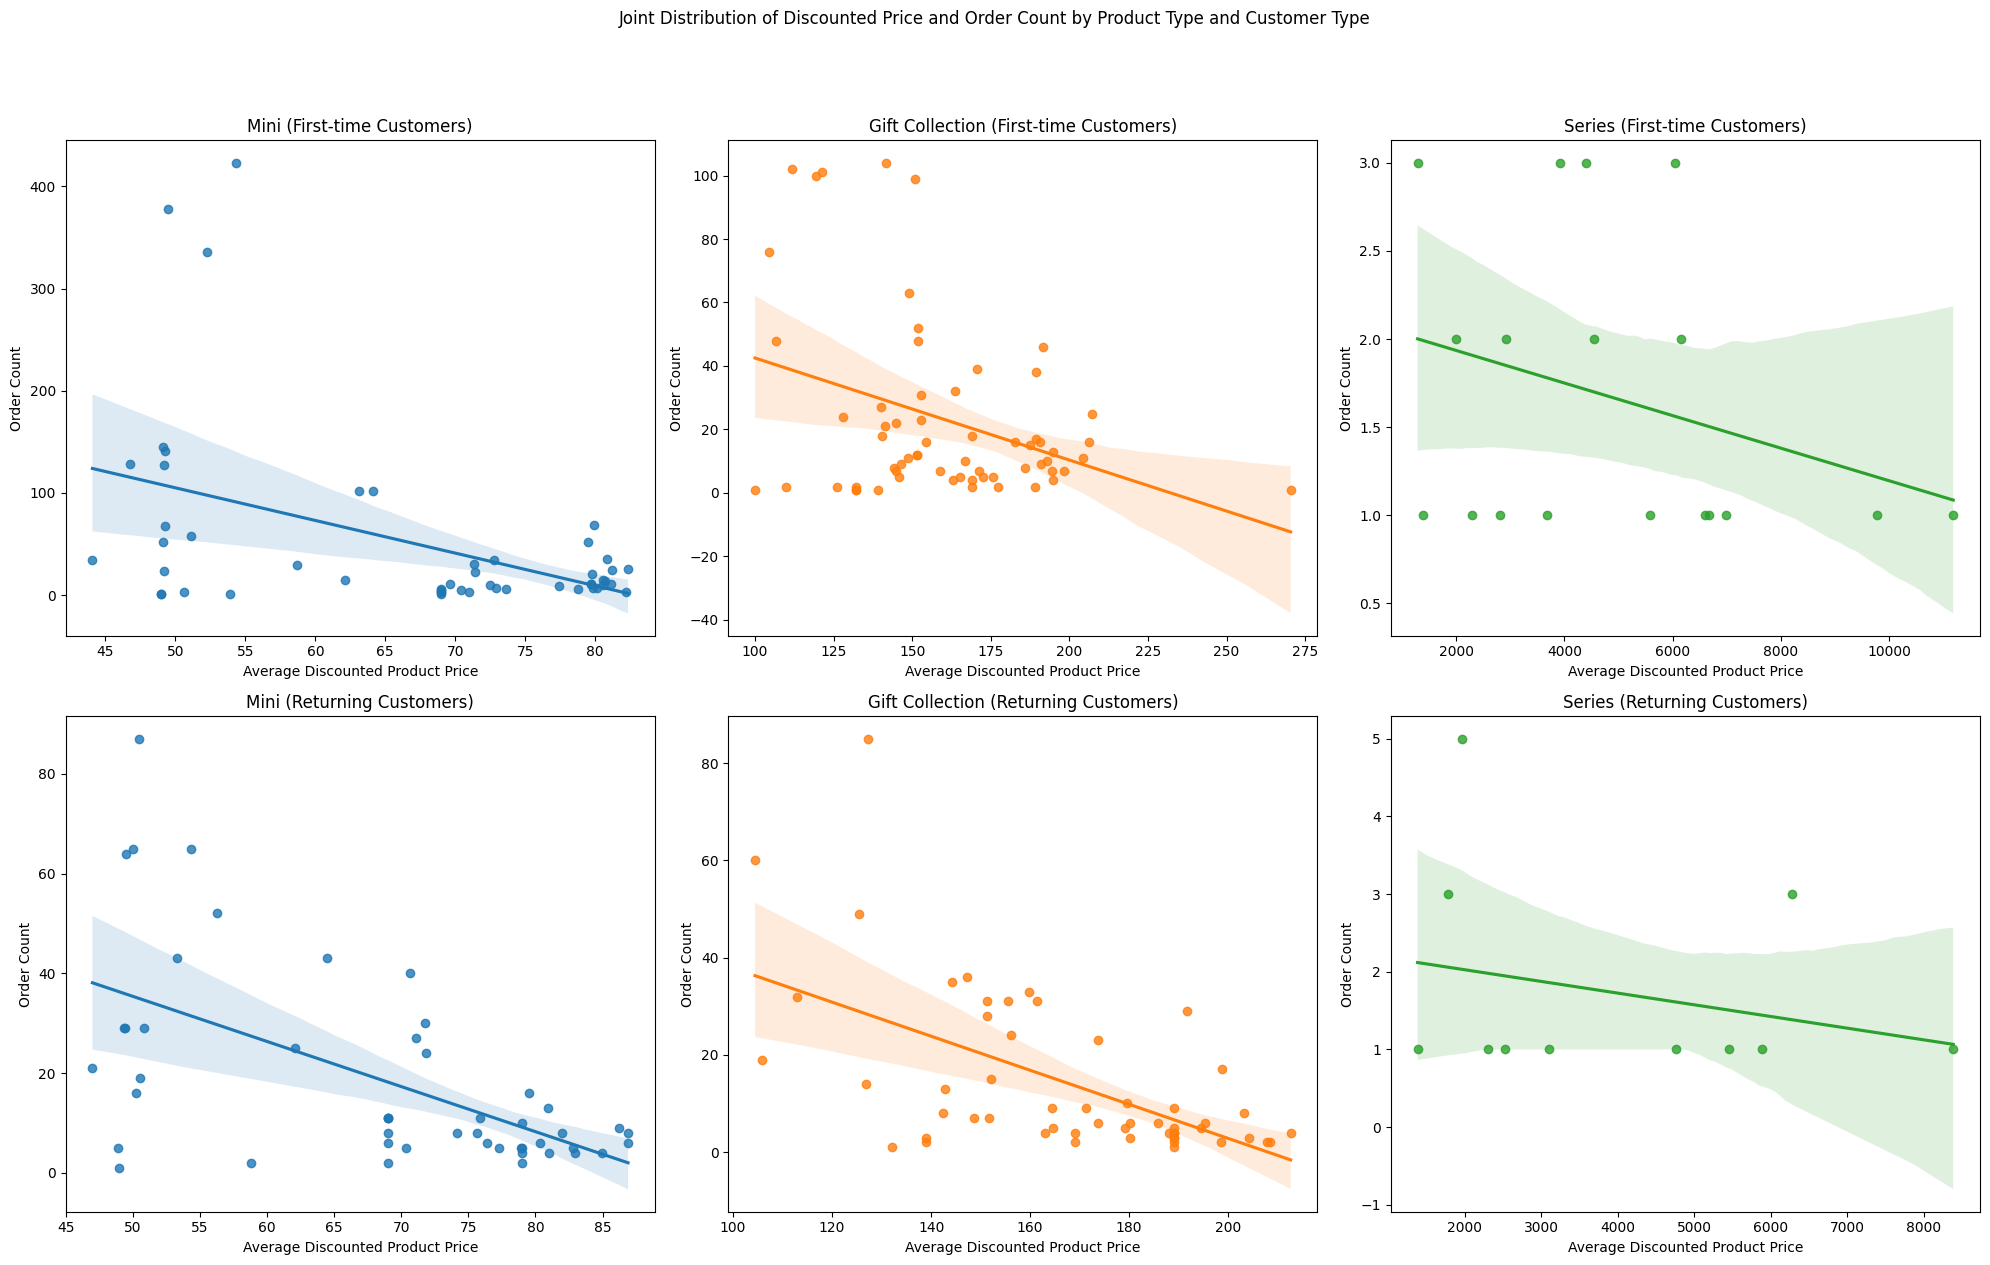

In [74]:
product_types = ['Mini', 'Gift Collection', 'Series']
customer_types = ['First-time', 'Returning']

filtered_df = df[df.product_type.isin(product_types) & ~((df.product_type == 'Gift Collection') & (df.product_price > 500))]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Joint Distribution of Discounted Price and Order Count by Product Type and Customer Type", y=1.05)

for j, customer_type in enumerate(customer_types):
    customer_df = filtered_df[filtered_df.customer_type == customer_type]
    
    monthly_data = customer_df.groupby([customer_df['day'].dt.to_period('M'), 'product_type']).agg({
        'price_discounted': 'mean',
        'product_price': 'mean',
        'order_id': 'count'  # Changed from 'net_sales': 'sum' to 'order_id': 'count'
    }).reset_index()

    monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

    for i, product_type in enumerate(product_types):
        data = monthly_data[(monthly_data['product_type'] == product_type)]
        sns.regplot(
            data=data,
            x="price_discounted",
            y="order_id",  # Changed from "net_sales" to "order_id"
            scatter=True,
            fit_reg=True,
            color=sns.color_palette()[i],
            ax=axes[j, i]
        )
        
        axes[j, i].set_title(f"{product_type} ({customer_type} Customers)")
        axes[j, i].set_xlabel("Average Discounted Product Price")
        axes[j, i].set_ylabel("Order Count")  # Changed from "Total Net Sales" to "Order Count"

plt.tight_layout()
plt.show()

Here we explore observed effects even further. And can see how price effects order amount more clearly. So there is a pronounced downward trend.

Pearson's correlation between monthly order count and average discounted price:
      Product Type Customer Type  Correlation   P-value  Significant
0             Mini    First-time    -0.447074  0.001005         True
1             Mini     Returning    -0.583781  0.000011         True
2  Gift Collection    First-time    -0.352565  0.004597         True
3  Gift Collection     Returning    -0.576817  0.000004         True
4           Series    First-time    -0.302872  0.221830        False
5           Series     Returning    -0.255498  0.448285        False


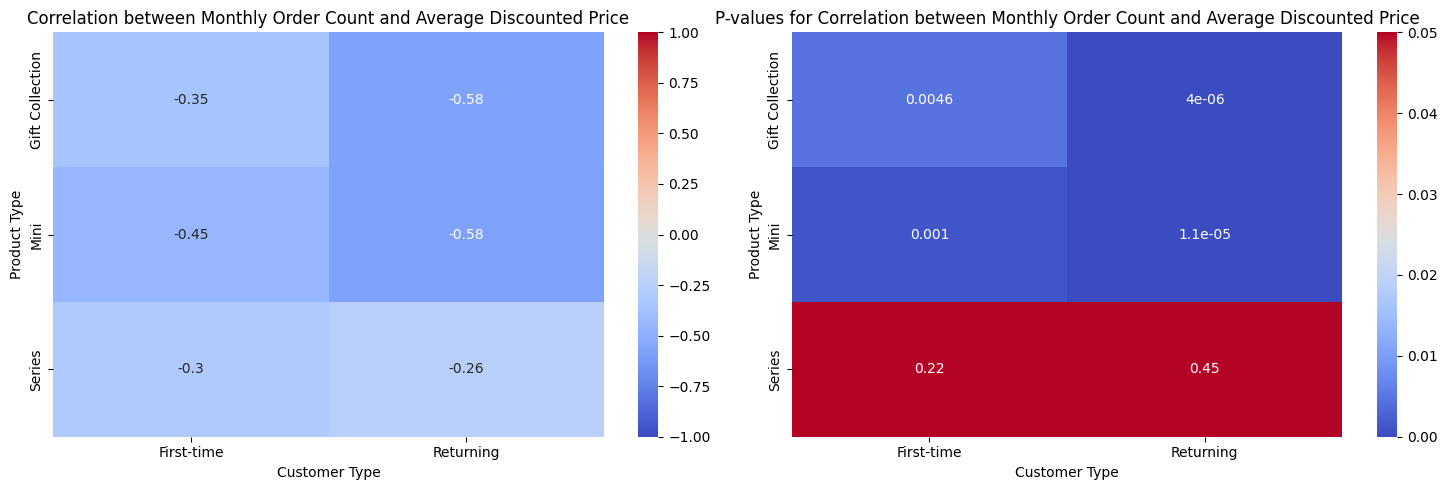

In [75]:
from scipy import stats

monthly_data = filtered_df.groupby([filtered_df['day'].dt.to_period('M'), 'product_type', 'customer_type']).agg({
    'order_id': 'count',
    'price_discounted': 'mean'
}).reset_index()

correlations = []

for product_type in product_types:
    for customer_type in customer_types:
        subset = monthly_data[(monthly_data['product_type'] == product_type) & 
                              (monthly_data['customer_type'] == customer_type)]
        
        correlation, p_value = stats.pearsonr(subset['order_id'], subset['price_discounted'])
        
        correlations.append({
            'Product Type': product_type,
            'Customer Type': customer_type,
            'Correlation': correlation,
            'P-value': p_value
        })

correlation_df = pd.DataFrame(correlations)
correlation_df['Significant'] = correlation_df['P-value'] < 0.05

print("Pearson's correlation between monthly order count and average discounted price:")
print(correlation_df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

correlation_pivot = correlation_df.pivot(index='Product Type', columns='Customer Type', values='Correlation')
sns.heatmap(correlation_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax1)
ax1.set_title("Correlation between Monthly Order Count and Average Discounted Price")

p_value_pivot = correlation_df.pivot(index='Product Type', columns='Customer Type', values='P-value')
sns.heatmap(p_value_pivot, annot=True, cmap='coolwarm', vmin=0, vmax=0.05, ax=ax2)
ax2.set_title("P-values for Correlation between Monthly Order Count and Average Discounted Price")

plt.tight_layout()
plt.show()


Tests showed that for Mini and Gift collection the impact is significant. And we also can see that it affects returning customers more and they have same rate for both categories. For first-timers effect is a bit less tangible with mini being slightly larger.

### Referring Channels


In [79]:
# Create a discrete color map for channel names
color_palette = px.colors.qualitative.Plotly
channel_names = df['referring_channel'].unique()
color_map = {channel: color_palette[i % len(color_palette)] for i, channel in enumerate(channel_names)}


In [80]:
channel_counts_10 = df.referring_channel.value_counts().head(10)

fig = px.bar(channel_counts_10, 
             title='Top 10 Referring Channels',
             labels={'index': 'Referring Channel', 'value': 'Count'},
             text_auto=True, 
             color=channel_counts_10.index,
             color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Referring Channel',
    yaxis_title='Count',
    legend_title_text='Referring Channel'
)

fig.show()

Facebook and direct by far the biggest channels

In [83]:
newc = df[df.customer_type == 'First-time']
channel_counts_10 = newc.referring_channel.value_counts().head(10)

fig = px.bar(channel_counts_10, 
             title='Top 10 Referring Channels First-time',
             labels={'index': 'Referring Channel', 'value': 'Count'},
             text_auto=True, 
             color=channel_counts_10.index,
             color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Referring Channel',
    yaxis_title='Count',
    legend_title_text='Referring Channel'
)

fig.show()

We see that Facebook is the main channel for attracting new customers. And direct being the next could signifies that they got the link from some of their contacts or by returning to the site after some conciderations. And thats a good think because that means people make their first order not from initial impulse but with actual intent.

In [82]:
ret = df[df.customer_type == 'Returning']
channel_counts_10 = ret.referring_channel.value_counts().head(10)

fig = px.bar(channel_counts_10, 
             title='Top 10 Referring Channels Returning',
             labels={'index': 'Referring Channel', 'value': 'Count'},
             text_auto=True, 
             color=channel_counts_10.index,
             color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Referring Channel',
    yaxis_title='Count',
    legend_title_text='Referring Channel'
)

fig.show()

Regular clients either come directly or throught mail announcements.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ref_sc = newc['referring_channel'].value_counts()
ref_sc = ref_sc[ref_sc > 10]

avg_net_sales_by_referral = newc[newc.referring_channel.isin(ref_sc.index)].groupby('referring_channel')['net_sales'].mean().sort_values(ascending=False).head(10)

ref_sc = ref_sc.reindex(avg_net_sales_by_referral.index)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=avg_net_sales_by_referral.index, y=avg_net_sales_by_referral.values, name='Average Net Sales', marker_color='lightblue'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=ref_sc.index, y=ref_sc.values, mode='lines+markers', name='Sales Count', line=dict(color='coral'), marker=dict(color='red')),
    secondary_y=True,
)

overall_mean = newc.net_sales.mean()

fig.add_hline(y=overall_mean, line_dash="dash", line_color="red", annotation_text=f"Mean: {overall_mean:.2f}", annotation_position="top right")

fig.update_layout(
    title='Average Net Sales by Referral Channel',
    xaxis_title='Referring Channel',
    yaxis_title='Average Net Sales',
    yaxis2_title='Sales Count',
    legend_title='Metrics',
    barmode='group'
)

fig.show()

In [ ]:
import scipy.stats as stats

mean_net_sales = newc['net_sales'].mean()

direct_sales = newc[newc['referring_channel'] == 'direct']['net_sales']
other_sales = newc[newc['referring_channel'] != 'direct']['net_sales']

t_statistic, p_value = stats.ttest_ind(direct_sales, other_sales)

alpha = 0.05
is_significant = p_value < alpha

print(f"Mean net sales across all channels: ${mean_net_sales:.2f}")
print(f"Mean net sales for 'direct' channel: ${direct_sales.mean():.2f}")
print(f"Mean net sales for other channels: ${other_sales.mean():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"The difference in net sales between 'direct' channel and other channels is {'statistically significant' if is_significant else 'not statistically significant'}.")
print(f"We {'can' if is_significant else 'cannot'} reject the null hypothesis that the means are equal.")


Mean net sales across all channels: $105.30
Mean net sales for 'direct' channel: $153.51
Mean net sales for other channels: $86.32
T-statistic: 5.7072
P-value: 0.0000
The difference in net sales between 'direct' channel and other channels is statistically significant.
We can reject the null hypothesis that the means are equal.


Here we also can ensure that direct channel is the superior in terms of the average purchase value. And it baisically generates organic traffic.

So we can cultivate it by stimulating people to share link with their contacts or posting on social media by providing some bonuces.

### Facebook posts

In [86]:
dff = pd.read_csv('datasets/facebook_posts.csv')
dff['channel_type'] = 'facebook'
dff.head(3)

,Post ID,Account ID,Account username,Account name,Description,Duration (sec),Publish time,Permalink,Post type,Data comment,Date,Impressions,Reach,Shares,Plays,Likes,Comments,Saves,Follows,Page ID,Page name,Title,Caption type,Is crosspost,Is share,Languages,Custom labels,Funded content status,3-second video views,1-minute video views,3-Second viewers,1-minute viewers,3-second video views from Boosted posts,3-second video views from Organic posts,"Reactions, Comments and Shares",Reactions,Seconds viewed,Average Seconds viewed,Estimated earnings (USD),Ad CPM (USD),Ad impressions,Total clicks,Other Clicks,Link Clicks,Matched Audience Targeting Consumption (Photo Click),Matched Audience Targeting Consumption (Video Click),Negative feedback from users: Hide all,Negative feedback from users: Hide,Impressions from Unpaid posts,Impressions from Boosted posts,Reach from Organic posts,Reach from Boosted posts,Engaged users,Negative feedback from users,Unique negative feedback from users,Unique negative feedback from users: Hide all,Unique negative feedback from users: Hide,REELS_PLAYS:COUNT,channel_type
0,4.602690e+15,NaN,NaN,NaN,NaN,0,31/08/2021 3:08,https://www.facebook.com/jeanpierreweill/posts...,Photos,NaN,09/15/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.243190e+14,Jean-Pierre Weill - 3D painting on glass,🌟🌟🌟\nS E P T E M B E R 1 7 T H \n🌟🌟🌟\n\nOUR ...,NaN,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,facebook
1,4.602690e+15,NaN,NaN,NaN,NaN,0,31/08/2021 3:08,https://www.facebook.com/jeanpierreweill/posts...,Photos,NaN,09/16/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.243190e+14,Jean-Pierre Weill - 3D painting on glass,🌟🌟🌟\nS E P T E M B E R 1 7 T H \n🌟🌟🌟\n\nOUR ...,NaN,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,facebook
2,4.602690e+15,NaN,NaN,NaN,NaN,0,31/08/2021 3:08,https://www.facebook.com/jeanpierreweill/posts...,Photos,NaN,09/17/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.243190e+14,Jean-Pierre Weill - 3D painting on glass,🌟🌟🌟\nS E P T E M B E R 1 7 T H \n🌟🌟🌟\n\nOUR ...,NaN,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,facebook


In [87]:
dfi = pd.read_csv('datasets/instagram_posts.csv')
dfi['channel_type'] = 'instagram'
dfi.head(3)

,Post ID,Account ID,Account username,Account name,Description,Duration (sec),Publish time,Permalink,Post type,Data comment,Date,Impressions,Reach,Shares,Plays,Likes,Comments,Saves,Follows,Page ID,Page name,Title,Caption type,Is crosspost,Is share,Languages,Custom labels,Funded content status,3-second video views,1-minute video views,3-Second viewers,1-minute viewers,3-second video views from Boosted posts,3-second video views from Organic posts,"Reactions, Comments and Shares",Reactions,Seconds viewed,Average Seconds viewed,Estimated earnings (USD),Ad CPM (USD),Ad impressions,Total clicks,Other Clicks,Link Clicks,Matched Audience Targeting Consumption (Photo Click),Matched Audience Targeting Consumption (Video Click),Negative feedback from users: Hide all,Negative feedback from users: Hide,Impressions from Unpaid posts,Impressions from Boosted posts,Reach from Organic posts,Reach from Boosted posts,Engaged users,Negative feedback from users,Unique negative feedback from users,Unique negative feedback from users: Hide all,Unique negative feedback from users: Hide,REELS_PLAYS:COUNT,channel_type
0,1.790000e+16,1.780000e+16,jeanpierreweillpaintings,3D Painting on Glass,S E P T E M B E R 1 7 T H \nO F F I C I A L ...,0,31/08/2021 3:08,https://www.instagram.com/p/CTPBazHD_nd/,IG image,NaN,Lifetime,145,138,2,NaN,37,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,instagram
1,1.790000e+16,1.780000e+16,jeanpierreweillpaintings,3D Painting on Glass,🌟🌟🌟It's here!🌟🌟🌟\nOur new Classique Collection...,0,18/09/2021 11:09,https://www.instagram.com/p/CT-UKu8IbBj/,IG image,NaN,Lifetime,98,95,0,NaN,36,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,instagram
2,1.800000e+16,1.780000e+16,jeanpierreweillpaintings,3D Painting on Glass,Petite and Minis ready at the Bezalel Fair in ...,7,24/09/2021 0:09,https://www.instagram.com/reel/CUMgFnVIEnP/,IG reel,NaN,Lifetime,874,837,0,2391.0,73,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,instagram


In [98]:
df_combined = pd.concat([dff, dfi], ignore_index=True)
df_combined['Publish time'] = pd.to_datetime(df_combined['Publish time'], format='%d/%m/%Y %H:%M')
df_combined['month_year'] = df_combined['Publish time'].dt.to_period('M').astype(str)
impressions_by_month = df_combined.groupby(['month_year', 'channel_type'])['Impressions'].sum().reset_index()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=("Facebook Impressions", "Instagram Impressions"))

facebook_data = impressions_by_month[impressions_by_month['channel_type'] == 'facebook']
fig.add_trace(
    go.Scatter(x=facebook_data['month_year'], y=facebook_data['Impressions'].replace(0, 0.1), mode='markers+lines', name='Facebook'),
    row=1, col=1
)

instagram_data = impressions_by_month[impressions_by_month['channel_type'] == 'instagram']
fig.add_trace(
    go.Scatter(x=instagram_data['month_year'], y=instagram_data['Impressions'].replace(0, 0.1), mode='markers+lines', name='Instagram'),
    row=2, col=1
)

fig.update_layout(height=800, title_text="Impressions Over Time by Channel Type")
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Impressions", type="log", row=1, col=1)
fig.update_yaxes(title_text="Impressions", type="log", row=2, col=1)


fig.show()


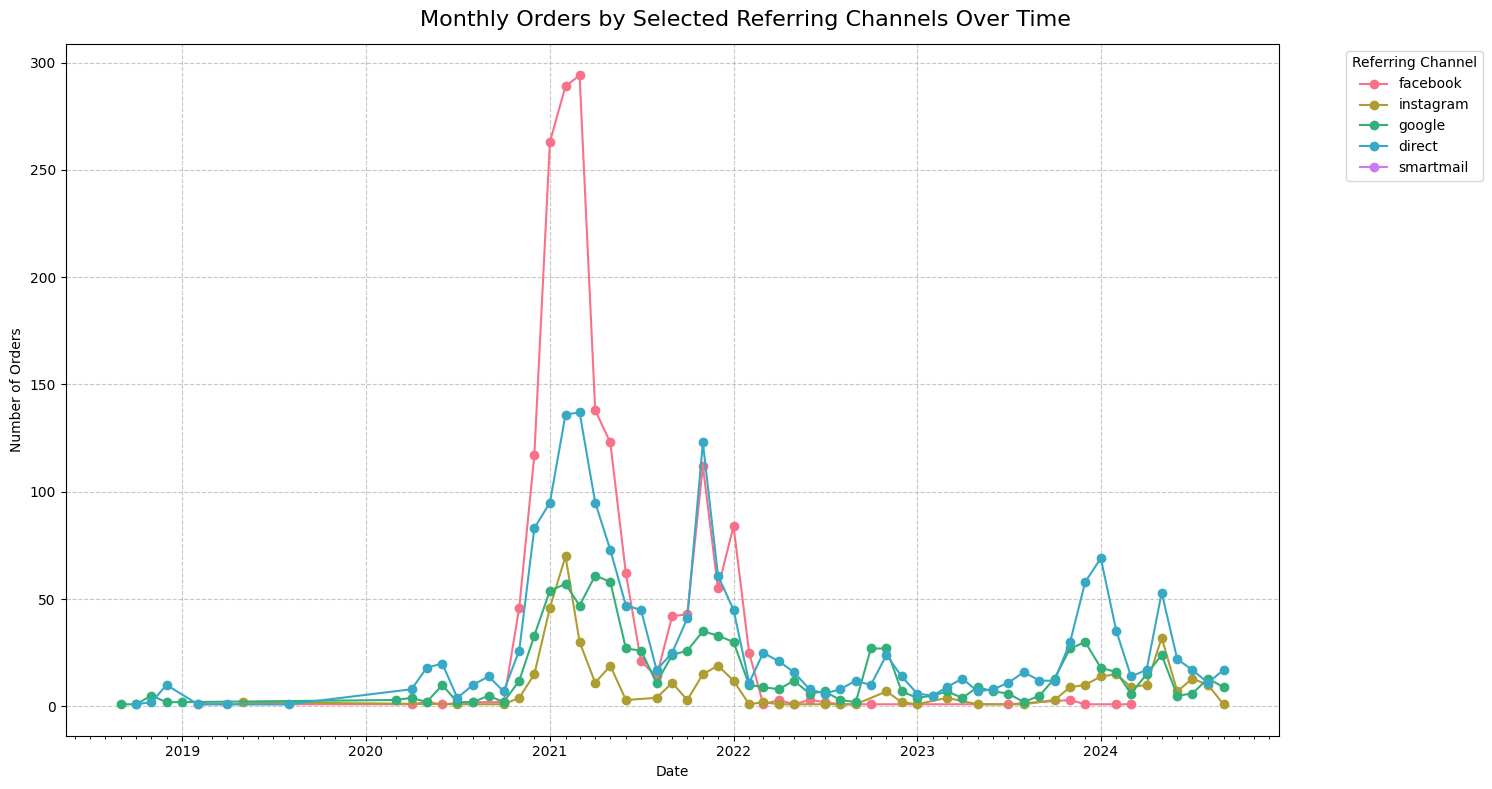

In [96]:
import matplotlib.dates as mdates


orders_by_channel = filtered_df.groupby([filtered_df['day'].dt.to_period('M'), 'referring_channel'])['orders'].sum().reset_index()

orders_by_channel['month'] = orders_by_channel['day'].dt.to_timestamp()

orders_by_channel['year'] = orders_by_channel['month'].dt.year
orders_by_channel['month_num'] = orders_by_channel['month'].dt.month

channels = ['facebook', 'instagram', 'google', 'direct', 'smartmail']

color_palette = sns.color_palette("husl", n_colors=len(channels))

fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('Monthly Orders by Selected Referring Channels Over Time', fontsize=16)

for j, channel in enumerate(channels):
    channel_data = orders_by_channel[orders_by_channel['referring_channel'] == channel]
    ax.plot(channel_data['month'], channel_data['orders'], 
            label=channel, color=color_palette[j], marker='o')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
ax.legend(title='Referring Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, linestyle='--', alpha=0.7)

# Format x-axis to show dates nicely
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()

And here we get insight on the one of the reasons why we get such there boosts in sales. The main resason is most likely some post going viral beforehand. And it produces huge traffic of new customers.